In [12]:
from graph import RoomGraph
import loader
import matplotlib.pyplot as plt
import numpy as np
import time
import time
import pylab as pl
from IPython import display

#### Funkcje pomocnicze

In [13]:
%matplotlib inline
def graph_to_heatmap(graph : RoomGraph):
    shape = (max(graph.walls, key=lambda x: x[0])[0] + 1, max(graph.walls, key=lambda x: x[1])[1] + 1)
    heatmap = [[0 for _ in range(shape[1])] for _ in range(shape[0])]
    for wall in graph.walls:
        heatmap[wall[0]][wall[1]] = 1
    for door in graph.doors:
        heatmap[door[0]][door[1]] = 2
    for table in graph.tables:
        heatmap[table[0]][table[1]] = 3
    for chair in graph.chairs:
        heatmap[chair[0]][chair[1]] = 4
    return heatmap

def animate_process(results, animation_step):
    plt.ion()
    heatmaps = []
    for i in range(0, len(results), animation_step):
        heatmaps.append((i + 1, graph_to_heatmap(results[i]['best'])))
    if heatmaps[-1][0] != len(results):
        heatmaps.append((len(results), graph_to_heatmap(results[-1]['best'])))
        
    _, ax = plt.subplots(figsize=(10, 10))
    for step, heatmap in  heatmaps: 
        ax.imshow(heatmap, cmap="Set3", interpolation='nearest')
        ax.set_title(f"epoch {(step)} / {len(results)}, number of chairs: {len(results[step - 1]['best'].chairs)}")
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1.0)

def show_grid(grid, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    heatmap = graph_to_heatmap(grid)
    ax.imshow(heatmap, cmap="plasma", interpolation='nearest')
    plt.title(title)
    plt.show()

### 1. Wygnerowania losowej planszy i zapisanie jej do pliku

In [15]:
from generate_grid import generate_grid

PATH = 'generated_grid'

# wygeneruj planszę o rozmiarze 10 na 10, ze stosunkiem 0.3 pól z '#' do wszytskich pól, zapisz plansze do pliku PATH.
generate_grid(10, 10, 0.3, PATH)

### 2. Uruchomienie algorytmu ewolucyjnego 

In [9]:
from loader import load_grid
from solution_finder import find_solutions

# załaduj graf reprezentujący plansze z pliku PATH
graph = load_grid(PATH) 

POPULATION_SIZE = 10
STEPS = 30

# uruchom algorytm ewolucyjny na planszy reprezentowanej przez graf graph, z rozmiarem populacji POPULATION_SIZE. 
# Algorytm powienien działać przez STEPS interacji.
# funkcja zwraca listę z krotkami zawierającymi stan planszy w kazdej iteracji i czas który zajeła dana iteracja.   
results = find_solutions(graph, POPULATION_SIZE, STEPS) 

epoch 1 took 0.01s | best solution: 10
epoch 2 took 0.01s | best solution: 10
epoch 3 took 0.01s | best solution: 10
epoch 4 took 0.02s | best solution: 10
epoch 5 took 0.02s | best solution: 10
epoch 6 took 0.01s | best solution: 10
epoch 7 took 0.02s | best solution: 10
epoch 8 took 0.01s | best solution: 10
epoch 9 took 0.01s | best solution: 10
epoch 10 took 0.01s | best solution: 10
epoch 11 took 0.01s | best solution: 10
epoch 12 took 0.01s | best solution: 10
epoch 13 took 0.01s | best solution: 10
epoch 14 took 0.02s | best solution: 10
epoch 15 took 0.01s | best solution: 10
epoch 16 took 0.01s | best solution: 10
epoch 17 took 0.01s | best solution: 10
epoch 18 took 0.02s | best solution: 10
epoch 19 took 0.02s | best solution: 10
epoch 20 took 0.02s | best solution: 10
epoch 21 took 0.02s | best solution: 10
epoch 22 took 0.02s | best solution: 10
epoch 23 took 0.02s | best solution: 10
epoch 24 took 0.01s | best solution: 10
epoch 25 took 0.02s | best solution: 10
epoch 26 

### 3. Wyniki działania algorytmu

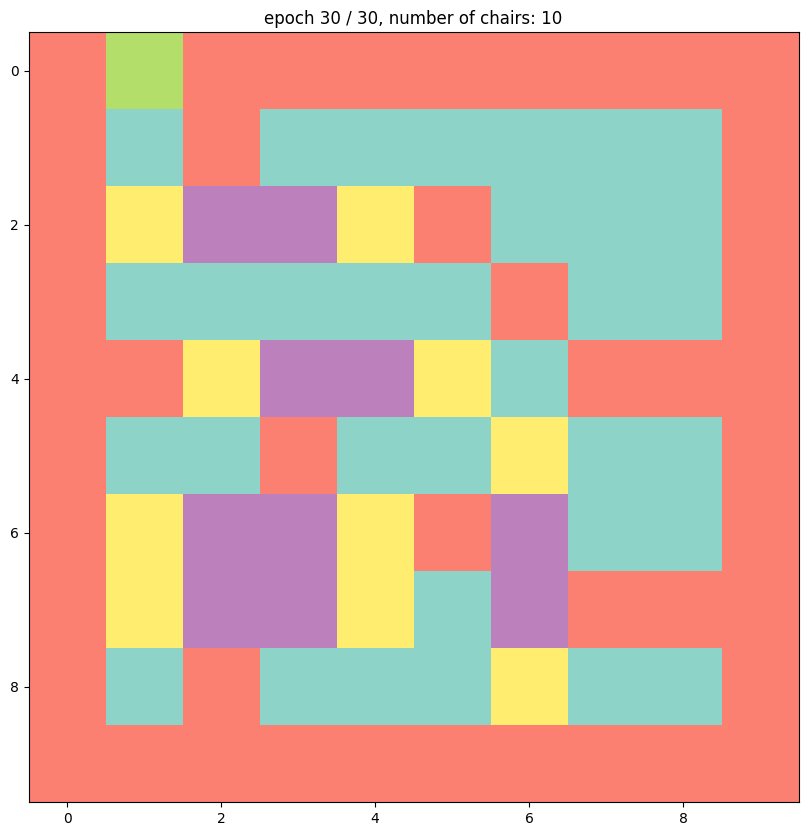

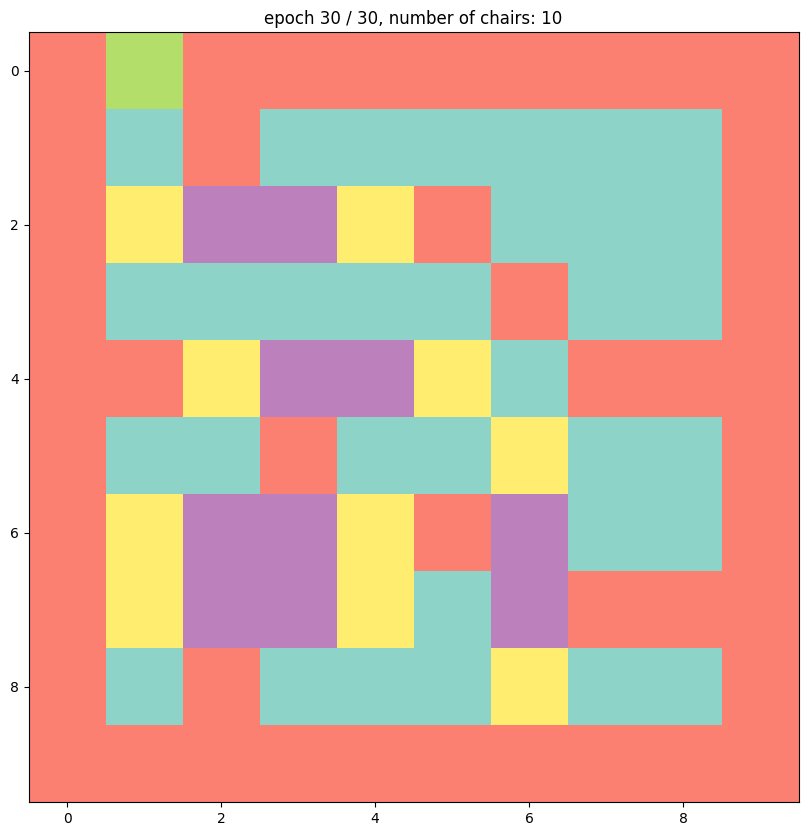

In [14]:
# uruchom animacje pokazującą jak zmienia się plansza w kolejnych iteracjach
animate_process(results, 2)